# Getting Started
## General Information On What You Can Expect To Learn From This Program
The goal of this program was to give you a way to interact with data that is taken from the sleep survey using python. This will allow you an easy introduction to coding and handling data in general. The Programming Language used in this document is Python. Python is one of the most used programming languages today. It is majorly favoured by the computer science community and generally anyone that deals with data sets. 

Through using this program you will learn about the basics of using python and interacting with data sets.



## Read Before Going Paste This Point!
One of the bugs with Jupyter and Pyplot integration is that it can only handle a certain number of graphs at once. This is why the graphs above the last executed cells disapear. You can make the graph reappear by simpling resizing the graph.

## How To Execute Code In Jupyter Lab
All of the code an text in Jupyter Lab is split into cells. These cells are executed seperately from each other in order as you proceed through the notebook. All of the contents of the previously executed cells are still available to new cells as you proceed through the notebook.
To execute each cell in this file you need to hit (Shift + Enter).

## How To Access The Documentation
If the documentation is not yet hosted on the web you can access it by click on 'html/idex.html'

# Importing modules
## General Information About Modules
Importing modules is the way python code access extra code that is not usable by default. This is usefull as it allows for extra code to be easily accessed in the current file without manually copying all of the relevent classes and functions into the file.

## The Modules Used In This File
The modules used here are:

- json
- numpy
- pandas
- seaborn
- datagraph

These modules are essentailly what allows the code to create graphs and interact with the data.


## Extra Information For The Curious
The modules available in python can be inbuilt, shipped with the default python installation, or an external module that a third party has made. By default some modules are automatically imported, and this is what allow you to run functions like *print()*.  The *import* compiler directive essentially tells the compiler to add the code that is in the module to the place where *import* is written.

If you want to look at the documentation for the modules used in this program click on the following links.

- https://numpy.org/
- https://pandas.pydata.org/
- https://matplotlib.org/
- https://seaborn.pydata.org/
- https://docs.python.org/3/library/json.html
- ####add a link to where i host my documentation later####


In [1]:
#Enables the use of interactive graphs in JupyterLab
%matplotlib widget 

import numpy as np #Imports numpy: a third party module that handles numerical opperations
import pandas as pd #Imports pandas: a third party module that handles the reading of data (In our case the CSV file)
import json, re #Imports json: an inbuilt modules the reading of JSON files (Extracts the question text)

from datagraph import Categorical, Other #Used to import the custom module that I Made that you will use to graph data


# Reading JSON Files And Getting Question Text
## Understanding Datasets

One of the most important steps when first looking at a dataset is understanding what the numbers represent or how information is represented. You need to know if the data stored consists of numerical data or as a group of letters (Strings). If this step is not done, data may not be read in correctly. It can also lead to unimportant data being analised and the conslusions made useless.

e.g If you analise a random set of numbers and find out what the mean and standard deviation are without knowing what those numbers represent that information is basically useless. While you may now know the characteristics of the data if you don't know how that translates in the real world what was the point of doing the analysis in the first place.

In our case the numbers can represent many things including:

- Your Gender
- How Old You Are
- Which Number Option You Chose To A Multichoice Question
- Any Many More

To gain a better understanding of the data it is recommended that you go to the following link and generate some graphs.
https://learn.pawsey.org.au/data/sleep/graphs


## Datasets Are Usually Very Unclean
An important step to processing data is making sure it is clean. In the sleep survey people are not required to do all of the seperate sections of the survey. This means that for some columns in the data may have blank cells that contain no data for specific questions. If this possible no answer is not taken into account it could affect statistics drawn from the data. e.g It could drop the average of an answer drastically.

Another common problem with the dataset collected is that some answers can be wrong or an outlier. e.g Someone on this survey has answered their age as 200 years old. If this data is not excluded or dealt with it could drastically affect the results drawn from that questions answers.

## Getting This Information
A common way that this informatiom is stored on websites is in JSON files. The JSON files we are reading 'sleep.jsonc' esentailly contains all of the all of the information that was used to create the sleep questionair that you have filled out.

Under the code cell bellow you will see two different outputs. The two groups shown below, surounded by curly brackets {}, contain what is know as a dictionary of all of the questions and fields in the sleep.jsonc file. You will notice that each small section of data first has a group of characters (Strings) contained in 'single quotation marks' and then has a collon : with data following that. The first group surounded by, ' ', with a question mark at the end is the question and the second part after the collon, :, is what fields the data will be in.

e.g In the small exert bellow 'What is your gender' is the question asked and ['Male', 'Female', 'Non-binary' and 'Prefer not to say'] are the possible otions the user can select. 'How often do I go to bed and worry about things happening at home or at school?' is again the question with ['Never', 'Once in a while', 'Sometimes', 'Quite often', 'Frequently if not always', 'Always'] being the possible choices in the quiz.

> {'What is your gender?': ['Male', 'Female', 'Non-binary', 'Prefer not to say'], ..., 'How often do I go to bed and worry about things happening at home or at school?': ['Never', 'Once in a while', 'Sometimes', 'Quite often', 'Frequently if not always', 'Always']} 

It is important that you can fild exactly how the questions are written as you will need this to access the surveys' data later. 

## If The Above Is Too Complicated
Essentially all you need to know to interact with the data is how to find exactly what each questions are in the survey. This is simply the sections of text that that are surounded by, ' ', and have a question mark at the end. If you have problems with this you can ask a teacher for help.

## What Does The Code Bellow Do?
The code bellow reds in the JSON file and extracts the questions from it.

### What Is Printed Bellow The Code?
The Two Groups of data printed bellow the code contain all of the questions in the survey. The first group of text is all of the categorical graph questions and labels that are stored in the sleep.jsonc file. The second group of text shows all of the non-categorical question data. 

## Reading in Survey Question Text

In [2]:
# https://stackoverflow.com/questions/46317639/how-can-i-handle-reading-a-json-file-in-it-that-has-comments-with-python/46317842
# https://docs.python.org/3/tutorial/inputoutput.html

with open('sleep.jsonc', 'r') as f: #Opens the sleep.jsonc file, reads its contents and stored the dat as s
    s = f.read()
s = str(s) #converts 's' to a string

jsonObject = json.loads(re.sub("//.*","",s,flags=re.MULTILINE)) #this is a little complicated. This essentially creates an object representation of a JSON file in the code. 
#It also uses regular expressions to change the jsonc (JSON file with c style comments) to a standard JSON file format by removing all the comments.
# print(jsonObject)

# print(jsonObject['questions'])
categorical_labels = {} #Dictionary created for storing categorical questions
other_labels = {} #Dictionary created for storing other types of questions

for i in jsonObject['questions']: #This loop actually reads in the question text data.
    try: 
        # print(f' {i["text"]}: {i["values"]}')
        if isinstance(i["values"][0], dict): # If the current object is of type dictionary the data is Categorical.
            tlist = []
            for j in i["values"]:
                tlist.append(j["label"])
            categorical_labels[i["text"]] = tlist #Adds the question text to a new dictionary
        else:   # If the object is not a dictionary then it must not be categorical.
            categorical_labels[i["text"]] = i["values"]
    except:
        other_labels[i["text"]] = i["type"]
        pass
#Want the Values column for each question if it exists
print(categorical_labels)
print(len(categorical_labels))
print(f"\n\n{other_labels}")
print(len(other_labels))


{'What is your gender?': ['Male', 'Female', 'Non-binary', 'Prefer not to say'], 'During your daytime activities, how much of a problem do you have with sleepiness?': ['No problem at all', 'A little problem', 'More than a little problem', 'A big problem', 'A very big problem'], 'What is the main reason you go to bed at this time on weekdays?': ['My parent / carer has set my bedtime', 'I feel sleepy', 'I finish my homework', 'My TV shows are over', 'My brother or sister go to bed', 'I finish socialising', 'I get home from my job', 'Other'], 'What is the main reason you wake up at this time on weekdays?': ['Noises or my pet wakes me up', 'My alarm clock wakes me up', 'My parent/carer or another family member wakes me up', 'I need to go to the bathroom', 'I donâ€™t know, I just wake up', 'Other'], 'How would you rate the quality of your sleep?': ['Very Poor', 'Poor', 'Fair', 'Good', 'Very Good'], 'What external factors influenced how well you slept last night?': ['Family/people disturbance

# Reading In The Survey Data From The CSV File

## What Are CSV Files
CSV, Comma-Separated-Values files are a common file type that is used to store data. The file is of a format where each seperate piece of data is seperated by a comma. This format allows for each seperate piece of data to be extracted easily by the computer.

## What Does The Code Bellow Do
The code bellow uses a module called pandas to read all of the files from the surveydata.csv file. This data is stored in a variable called s_data.
Bellow the code you can see that data that is being imported in a chart. The question titles can be seen in bold at the top of the chart.


In [3]:
s_data = pd.read_csv('surveydata.csv') #A Function in pandas that reads in CSV files and creates a dataFrame or a data Series.
s_data #Prints the dataFrame to the window


,Timestamp,In which country are you currently located?,In which city are you currently located?,How old are you?,What is your gender?,"During your daytime activities, how much of a problem do you have with sleepiness?",What time do you try to go to sleep?,What is the main reason you go to bed at this time on weekdays?,How long does it take you to fall asleep?,What time do you wake up?,...,How many hours did you study/do homework?,How often have you arrived late to class because you overslept?,"Currently, what are your grades in school mostly?","If you compare yourself to other people your age, how would you describe your health?",How often do I go to bed and think about things I need to do?,How often do I go to bed and replay the day’s events over and over in my mind?,How often do I check my clock several times during the night?,"During the 1 hour before bedtime, how often do things happen that make me feel strong emotions?",How often do I go to bed feeling upset?,How often do I go to bed and worry about things happening at home or at school?
0,01/06/2021 07:24:37,Australia,Perth,29,NaN,2,22.0,I get home from my job,45,6.0,...,50.0,Never,A’s and B’s,3.0,3.0,2.0,2.0,2.0,1.0,2.0
1,07/06/2021 23:33:43,Australia,Perth,43,Female,0,22.0,I feel sleepy,10,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08/06/2021 07:49:50,Australia,Perth,28,Male,1,23.0,I feel sleepy,15,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/06/2021 08:12:38,Australia,Perth,28,Male,1,23.0,I feel sleepy,15,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08/06/2021 08:14:37,Australia,perth,40,Female,1,22.5,Other,20,6.5,...,20.0,Never,A’s and B’s,2.0,4.0,4.0,4.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,26/11/2021 04:20:27,Australia,Perth,16,Male,0,10.5,I feel sleepy,10,6.0,...,NaN,NaN,NaN,3.0,2.0,2.0,0.0,0.0,1.0,3.0
711,26/11/2021 04:24:09,Australia,Perth,16,Female,0,22.0,I feel sleepy,20,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
712,26/11/2021 04:27:42,India,pune,24,Non-binary,4,4.5,My parent / carer has set my bedtime,2,5.0,...,0.0,Everyday,D’s and F’s,4.0,0.0,5.0,5.0,5.0,5.0,0.0
713,26/11/2021 04:48:08,Australia,wa,16,Female,2,22.5,I get home from my job,30,6.5,...,4.0,Once,B’s and C’s,2.0,3.0,3.0,2.0,3.0,3.0,3.0


# Accessing And Manipulating Data
All of the data will now be accessed by using the *s_data* variable. **This is where knowing the exact questions asked in the survey is important.** To acess the data contained in columns of the data above you need to use the following code: s_data['question'], where question in the question that you want the data from. 
> e.g
>
> data = s_data['In which city are you currently located?']
>
> data = s_data['How old are you?']

In the following two blocks you can see what this looks like. Feel free to change the question text contained in the [] bellow to see what other field of data look like. 

In [4]:
data = s_data['In which city are you currently located?'] #Gets the relevent data for the question
data #Prints Out The Series

0      Perth
1      Perth
2      Perth
3      Perth
4      perth
       ...  
710    Perth
711    Perth
712     pune
713       wa
714    perth
Name: In which city are you currently located?, Length: 715, dtype: object

In [5]:
data = s_data['How old are you?'] #Gets the relevent data for the question
data #Prints Out The Series

0      29
1      43
2      28
3      28
4      40
       ..
710    16
711    16
712    24
713    16
714    16
Name: How old are you?, Length: 715, dtype: int64

## For A Good Tutorial On How To Use Pandas
https://www.youtube.com/watch?v=vmEHCJofslg
# Cleaning And Changing The Data Into The Required Format For Graphing

Currently the data is in the wrong data type for it to be graphed using the methods in the datagraph module. Another Problem you might come across is some data may contain Nan values. This is the module numpys' way of saying their was no data entered. To get rid of these nan values and change the data into the format we want we need to run the following code.


In [6]:
m_data = data.dropna() #Removes any Nan Values
m_data = m_data.to_numpy() #Changes the pandas Series object to a Numpy List
m_data = m_data.tolist() #Changes the Numpy list to a python list.
#This can also be written like this
#m_data = data.dropna().to_numpy().tolist()
m_data[-9:]

[15, 12, 34, 11, 16, 16, 24, 16, 16]

# Graphing Your First Data Set
## What Are Functions, Arguments And Keyword Arguments

Each of the methods used in both the Graph and the Categorical Class require the entering of data by keyword arguments. Keyword arguments are values that are passed into methods by name. e.g In the following piece of code *data* is the keyword and *frequency* is the passed argument. To find information about any module the first place you should check is the documentation. This small exert of the documentation shows the default keyword arguments for the Categorical object.

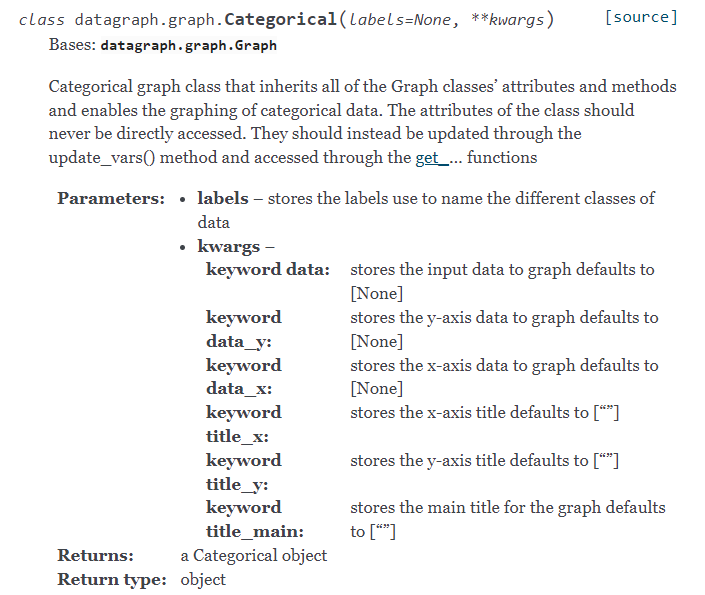

If you have any questions about how to use the datagraph module you should check the documentation. 
The datagraph module has two main classes that you will be interacting with are *Categorical* and *Other*. The Categorical class allows you to produce categorical graphs. Likewise, the Other class allows the generation of all the other types of graph the datagraph module has. Bellow this block an example of how to produce each type of graph is shown.


## Creating Your First Categorical Object

The first step is to read the documentati
on.

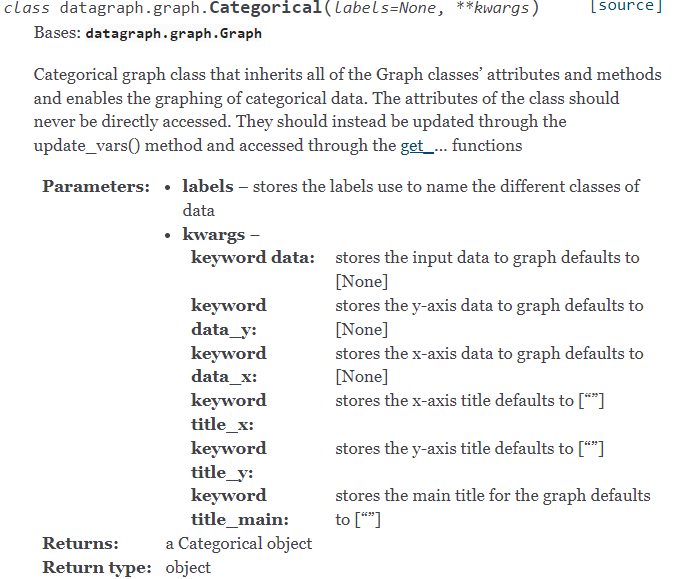

As seen above the Categorical object takes six optional keyword arguments. While entering the keyword arguments when creating the Categorical object is not required, it is recommended as it allows you to call all of the types of graphs in this object without needing to enter the keyword arguments again. Bellow you will see how to create your first Categorical object. One thing you may notice is that each seperate variable you are passing through is defined outside of creating the object. This practise, while not necessary, is a good practise as it makes it easier to read and debug your code if something goes wrong.


In [7]:
#Step 1 Localise the data
title_data = 'If you compare yourself to other people your age, how would you describe your health?' #Sets the title as a variable
data_bar = s_data[title_data] #This is the data that is going to be entered into the graph
frequency = data_bar.value_counts(sort=False) #Extracts the frequncy of responses per category as a list
frequency = frequency.sort_index(ascending=True) #Sorts the list so that the numbers are ascending
frequency = frequency.dropna().to_numpy().tolist() #Removes Nan varaibles and converts to a python list (As explained above)
ypos =  np.arange(len(frequency)) #Automatically assigns indexs for each number in the data
labels = categorical_labels[title_data] #Gets the relevent lables for each graph.

#Creating the Categorical Object with the data created above
c = Categorical(data=frequency, title_main=title_data, labels=labels , title_x = "Amount", title_y="Criteria") 

## Graphing a Bar and Pie Chart
As always the first step when using a function that you dont know how to use is looking it up in the documentation.

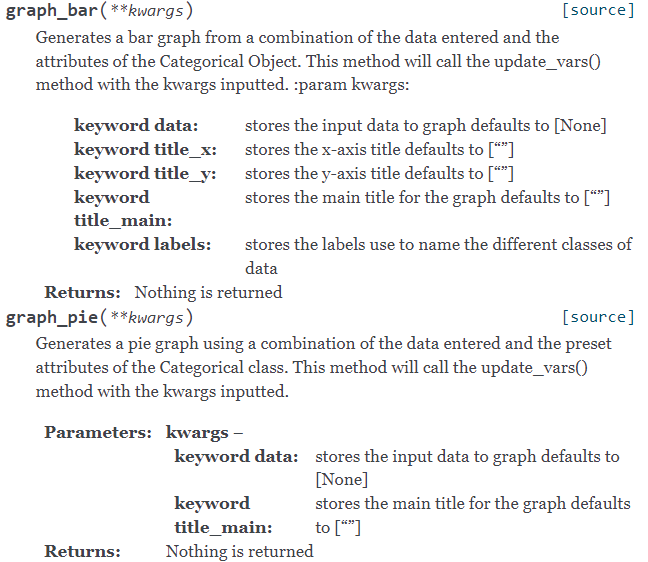

You Notice that you can enter the same keyword arguments as when you created the Categorical object. Again these are not required if you have entered the required information, in this case only the **data** keyword argument. If you have already entered all of the neccesarry information when creating the categorical object then all you have to do to create a graph is call the relevent method attached to the object.

>c.graph_bar()
>
>c.graoh_pie()

All of the other graph methods will have a documentation page that looks similar to this the one above. The variable names that you are to use follow ***keyword:***. 

E.g **keyword:** data 
- used to change the data in the graph. This can be done trough the graph method by using it as a keyword argument. e.g c.graph_bar(data=[]). 

If you want to enter new data when creating the graph, all you have to do is use the relevent keywords. You may also notice that the third graph does not have any titles. This is because we haven't entered any title texts. While you can create a graph with the minimum field of only the data, it is recommended that you add all of the other fields.

In [8]:
#This allows us to create multiple types of graphs without needing to enter all of the different keyword arguments again.
c.graph_bar() #Creates a Bar Graph
c.graph_pie() #Creates a Pie Graph


temp = s_data[title_data].dropna().to_numpy().tolist() #Cleaning the data and converting the a python list

temp[:30]
g = Categorical() #Creating a Categorical object with defaut attributes
g.graph_bar(data=temp[:30]) #Creating a bar graph with the minimum required attributes

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

The Graph above is an example of how a graph with no titles is useless.

# Using Other Graphs
## Graphing A Box Plot
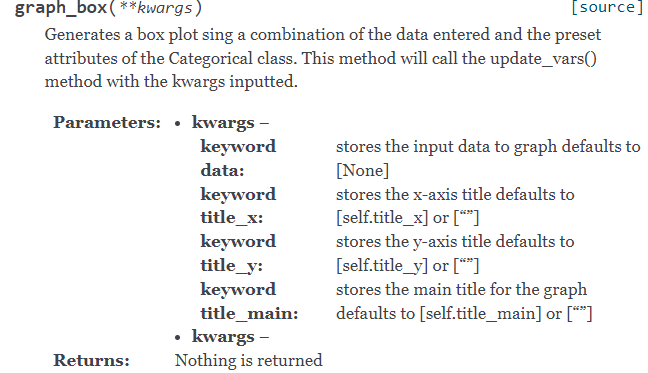

In [9]:
frequency = s_data['How old are you?']


oth = Other(title_main=title_data, data=frequency)
oth.graph_box(title_main="Boxplot Of The Age Of People Taking This Survey")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Example of Messy Data
Above here is a perfect example of how data can be messy. There is one person on this chart that has entered their age as 200 years old. This is the sort of thing you have to account for when dealing with data sets. The Graph Below Removes any data entry that is over 200 years old using list comprehension. The code in the cell bellow filters out anyone that is over 50 years old.

**For more info about list comprehension**

*[Click This Link!](https://realpython.com/list-comprehension-python/#:~:text=Every%20list%20comprehension%20in%20Python%20includes%20three%20elements%3A,return%20its%20elements%20one%20at%20a%20time.%20)*

In [10]:
nfreq = [x for x in frequency if x <= 50] #This is done by using list comprehension. Change the 50 to change what age is filtered out.
nfreq[:20]
oth.graph_box(data=nfreq, title_x="Age of Person (Years)")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Creating Lollipop Graphs
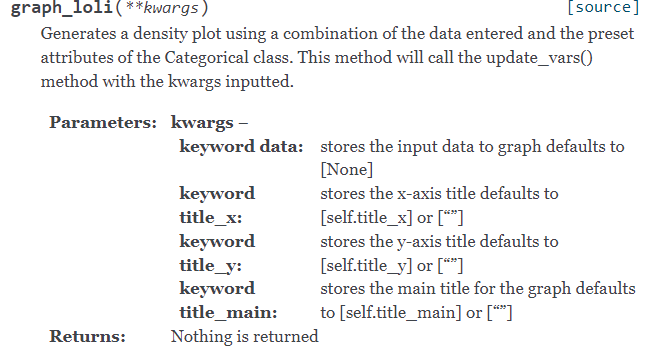

In [11]:
oth.graph_loli(title_main="LolliPop Graph of The Age Of People Taking This Survey", title_y="Data Entry Number")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Example Of An Nonoptimal Graph Choice
Another thing that you have to consider when graphing data is what each type of graph displays. A Lolipop graph should only really be used when there is les then 100 data points. While this graph is usefull other graphs may be better of understanding this data. E.g the Box Plot shown previously.

## Creating Scatter Plots
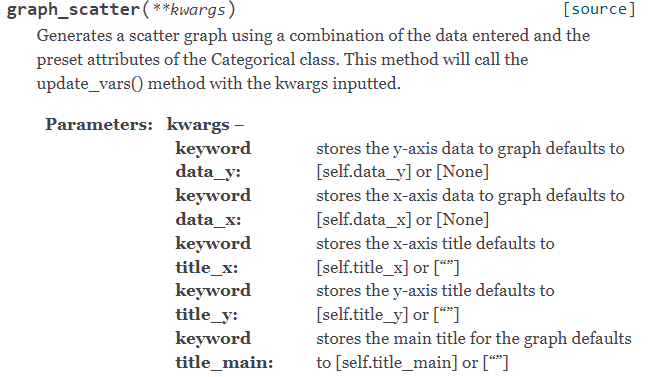

### An Example of What Can Go Wrong
Don't worry about the error that you recieve bellow this is meant to be displayed.
When you do something wrong in this module you will get an error with multiple Warnings written above them. Read what the Warnnings say and this is probably the reason why nothing was graphed. In this case the two Warnings are:

>Warning: No Data Has Been Entered Into (data_x). Please check that data was entered when creating the graph object or creating a graph
>
>Warning: No Data Has Been Entered Into (data_y). Please check that data was entered when creating the graph object or creating a graph

This is alerting you to the fact that you are tying to graph a Scatterplot without entering data into it first!.

In [12]:
oth.graph_scatter()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Error: Something Went Wrong in executing graph_scatter. Please check if you have recieved any warnings and adjust the code to suit. 
##############SEARCH THIS##############
need at least one array to concatenate
##############END ERROR##############




### To Fix The Error
To fix the error we just need to enter the data that was missed. This is shown in the code bellow.

In [13]:
data_x = s_data['What time do you try to go to sleep?'].dropna().to_numpy().tolist()
data_y = s_data['How old are you?'].dropna().to_numpy().tolist()
title_main = "What Time Do You Try To Go To Sleep VS How Old Are You?"
oth.graph_scatter(data_x=data_x, data_y=data_y, title_main=title_main, title_x="What Time Do You Try To Go To Sleep (Hours)", title_y="Age (Years)")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Density Graphs
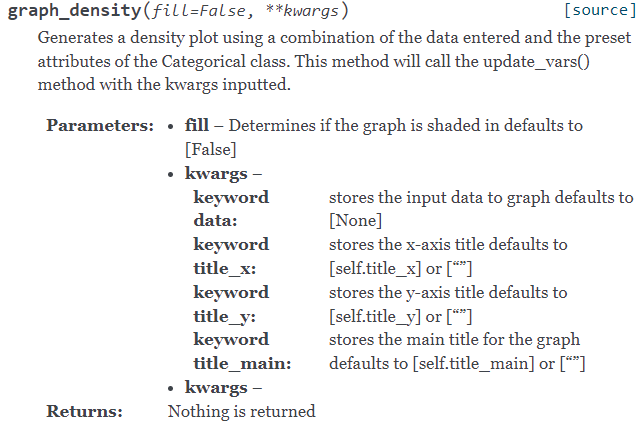

Here you may notice there is an extra parameter that the other graphs don't have. This variable controlls whether the area under the line is shaded or not. Below You can see two graphs, one with the graph unshaded and the other with it shaded,

In [14]:
oth.graph_density(title_y="Density of Peoples Age")
oth.graph_density(fill=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Violin Graphs
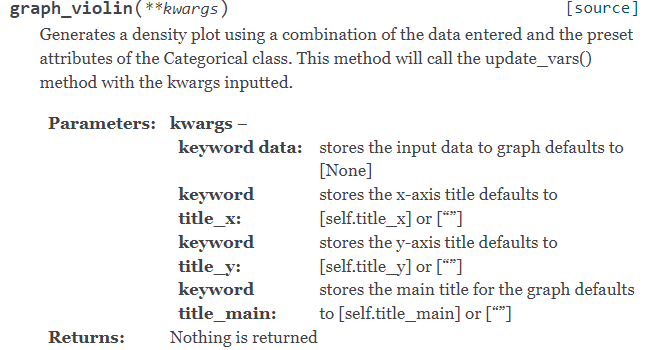

In [15]:
oth.graph_violin(title_main="Violin Plot Of The Age Of People Taking This Survey", title_x=" ", title_y = "Age Of People (Years)")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Common Errors

## Attribute Error
**AttributeError:** 'Categorical' object has no attribute '<text>'
This error simply means how have misspelt the method name you have attached after the object you have created.
Can you see the error in this next piece of code?


In [16]:
c.graph_ba(data=[1, 2, 3, 4], title_main="This is a test for reassignment")

AttributeError: 'Categorical' object has no attribute 'graph_ba'

### The Error is:
The Error is that 'c.graph_ba' should be 'c.graph_bar'

## Value Error (FixedLocator)
**Value Error:** The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (4).
This error ussually occurs when the number of labels does not match the size of the data set used. In the case below we have 5 pieces of data and only 4 labels.

In [17]:
print(c.get_data())
print(c.get_labels())

print("\n\n"
"Example\n")
c.graph_bar(data=[1, 2, 3, 4, 5], title_main="This is a test for reassignment")

[13.62530413625304, 28.710462287104622, 38.929440389294406, 18.734793187347933]
['Poor', 'Fair', 'Good', 'Excellent']


Example



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Error: Something Went Wrong in executing graph_bar. Please check if you have recieved any warnings and adjust the code to suit.The most likely cause is that no data has been entered. Please check if data was entered when creating theCategorical object or calling the graph_bar function!
##############SEARCH THIS##############
The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (4).
##############END ERROR##############




# If You Get An Error That Is Not Covered Above
In any coding language having errors is a common occurance. Do not worry if you get an error, every single person who codes causes errors. If the errors are not shown bellow, copy the last line of the error in red into the web browser and go the website like stack overflow. You should be able to find an answer there.
 

# Things That Dont Cause Error Messages But Can Cause Interesting Results
When coding there will be times that you make a mistake and will get an interesting result that does not produce a crash. These are the hardest type of errors to find and fix. The code below shows examples of cases where this has happened.

## Entering Num Integer Data into the data attribute

In [18]:
c.graph_bar(data=['One', 'Two', 'Three', 'Four'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# From This Point It Is Up To You To Explore The Data Set Further By Creating Your Own Graphs!